In [1]:
%load_ext autoreload

%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

xy = (0.7853981633974483, 90.0)
xy = (0.7853981633974483, 60.0)
xy = (0.7853981633974483, 30.0)
xy = (0.7853981633974483, 0.0)
xy = (0.7853981633974483, 120.0)


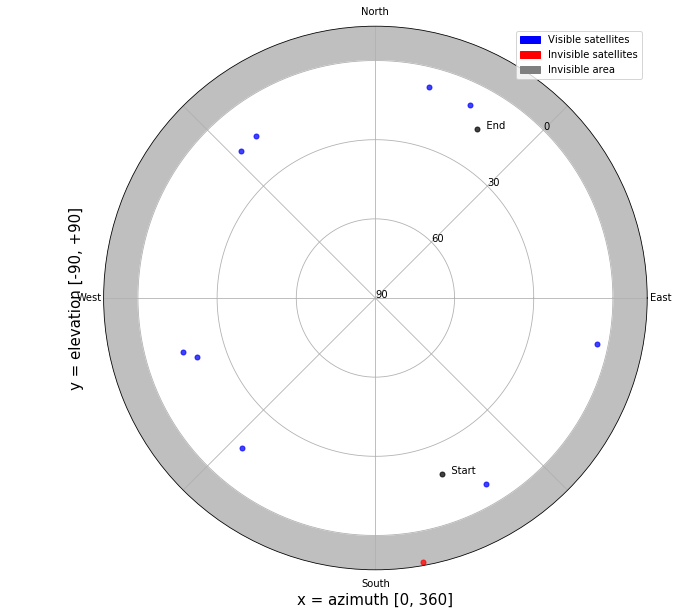

In [3]:
from tracker import plotter

n = 12
az = np.random.uniform(size=n) * 360.0
el = np.random.uniform(low=-1.0, high=1.0, size=n) * 20

plotter.plot_az_el(az, el)
plt.show()

In [4]:
from tracker.tle_getter import get_tle

OBS_LAT = -15.989620
OBS_LON = -48.044411
OBS_ALT = 500 # meters


ISS_TLE = ('1 25544U 98067A   18264.87214538 -.00000479 +00000-0 +00000-0 0 9990',
           '2 25544 051.6411 256.8919 0004651 185.2142 246.8508 15.53744581133552')
ISS_TLE = get_tle(name='ISS')
print('ISS_TLE = {}'.format(ISS_TLE))

ISS_TLE = ('1 25544U 98067A   18298.51635846  .00001514  00000-0  30392-4 0  9998', '2 25544  51.6406  89.2479 0003892 336.3122 134.3245 15.53861856138782')


In [5]:
from tracker.satellite import Satellite
from datetime import datetime, timezone

iss = Satellite(ISS_TLE[0], ISS_TLE[1])
utc_satview = datetime(year=2018,
                       month=10,
                       day=10,
                       hour=22,
                       minute=1,
                       second=35,
                       tzinfo=timezone.utc)

iss_position, v = iss.propagate(utc_satview)

print('iss_position = {}'.format(iss_position))
b = (768350.0713588104, 6538760.196343955, -1632694.711713458)

print(iss_position == b)

iss_position = (1540375.1919788667, -4513067.418853687, 4819742.742248573)
False


In [6]:
def get_row(satview_az, satview_el, sat, lat, lon, alt, date):
    az, el = sat.get_observer_azimuth_elevation(lat, lon, alt, date=date)
    return [satview_az, satview_el, az, el, date]

In [7]:
rows = []

utc_satview_date = datetime(year=2018,
                       month=10,
                       day=20,
                       hour=22,
                       minute=3,
                       second=58,
                       tzinfo=timezone.utc)
rows.append(get_row(137.88, -44.77, iss, OBS_LAT, OBS_LON, OBS_ALT, utc_satview_date))

utc_satview_date = datetime(year=2018,
                       month=10,
                       day=20,
                       hour=22,
                       minute=46,
                       second=34,
                       tzinfo=timezone.utc)
rows.append(get_row(317.97, -51.94, iss, OBS_LAT, OBS_LON, OBS_ALT, utc_satview_date))

utc_satview_date = datetime(year=2018,
                       month=10,
                       day=20,
                       hour=22,
                       minute=51,
                       second=13,
                       tzinfo=timezone.utc)
rows.append(get_row(313.60, -43.08, iss, OBS_LAT, OBS_LON, OBS_ALT, utc_satview_date))

utc_satview_date = datetime(year=2018,
                       month=10,
                       day=20,
                       hour=22,
                       minute=52,
                       second=53,
                       tzinfo=timezone.utc)
rows.append(get_row(311.97, -39.89, iss, OBS_LAT, OBS_LON, OBS_ALT, utc_satview_date))

utc_satview_date = datetime(year=2018,
                       month=10,
                       day=20,
                       hour=22,
                       minute=55,
                       second=27,
                       tzinfo=timezone.utc)
rows.append(get_row(309.25, -34.94, iss, OBS_LAT, OBS_LON, OBS_ALT, utc_satview_date))

In [8]:

df_comparison = pd.DataFrame(rows, columns=['SatView azimuth', 'SatView elevation', 'Calculated azimuth', 'Calculated elevation', 'Date'])
df_comparison['Azimuth error'] = (df_comparison['SatView azimuth'] - df_comparison['Calculated azimuth']).abs()
df_comparison['Elevation error'] = (df_comparison['SatView elevation'] - df_comparison['Calculated elevation']).abs()
column_order = ['SatView azimuth', 'SatView elevation', 'Calculated azimuth',
       'Calculated elevation', 'Azimuth error', 'Elevation error', 'Date', ]

df_comparison = df_comparison[column_order]
display(df_comparison)
pd.options.display.float_format = '${:,.2f}'.format

values = df_comparison.values

,SatView azimuth,SatView elevation,Calculated azimuth,Calculated elevation,Azimuth error,Elevation error,Date
0,137.88,-44.77,137.376371,-45.217466,0.503629,0.447466,2018-10-20 22:03:58+00:00
1,317.97,-51.94,317.439410,-52.435983,0.530590,0.495983,2018-10-20 22:46:34+00:00
2,313.60,-43.08,313.079313,-43.568845,0.520687,0.488845,2018-10-20 22:51:13+00:00
3,311.97,-39.89,311.441664,-40.369922,0.528336,0.479922,2018-10-20 22:52:53+00:00
4,309.25,-34.94,308.730671,-35.415436,0.519329,0.475436,2018-10-20 22:55:27+00:00


In [9]:
def dataframe_to_latex(df):
    values = df.values
    for r in values:
        for i, x in enumerate(r):
            if i > 0:
                print(' & ', end='')
            if isinstance(x, datetime):
                print(x.strftime('%d/%m/%Y %H:%M:%S'), end='')
            else:
                print('{:.2f}'.format(x), end='')
        print(' \\\\ \\hline')
dataframe_to_latex(df_comparison)

137.88 & -44.77 & 137.38 & -45.22 & 0.50 & 0.45 & 20/10/2018 22:03:58 \\ \hline
317.97 & -51.94 & 317.44 & -52.44 & 0.53 & 0.50 & 20/10/2018 22:46:34 \\ \hline
313.60 & -43.08 & 313.08 & -43.57 & 0.52 & 0.49 & 20/10/2018 22:51:13 \\ \hline
311.97 & -39.89 & 311.44 & -40.37 & 0.53 & 0.48 & 20/10/2018 22:52:53 \\ \hline
309.25 & -34.94 & 308.73 & -35.42 & 0.52 & 0.48 & 20/10/2018 22:55:27 \\ \hline


# Erro médio

In [10]:
df_err = df_comparison[['Azimuth error', 'Elevation error']].describe()
df_err.drop(['count', 'min', '25%', '50%', '75%'], inplace=True)
display(df_err)

,Azimuth error,Elevation error
mean,$0.52,$0.48
std,$0.01,$0.02
max,$0.53,$0.50


xy = (0.7853981633974483, 90.0)
xy = (0.7853981633974483, 60.0)
xy = (0.7853981633974483, 30.0)
xy = (0.7853981633974483, 0.0)
xy = (0.7853981633974483, 120.0)


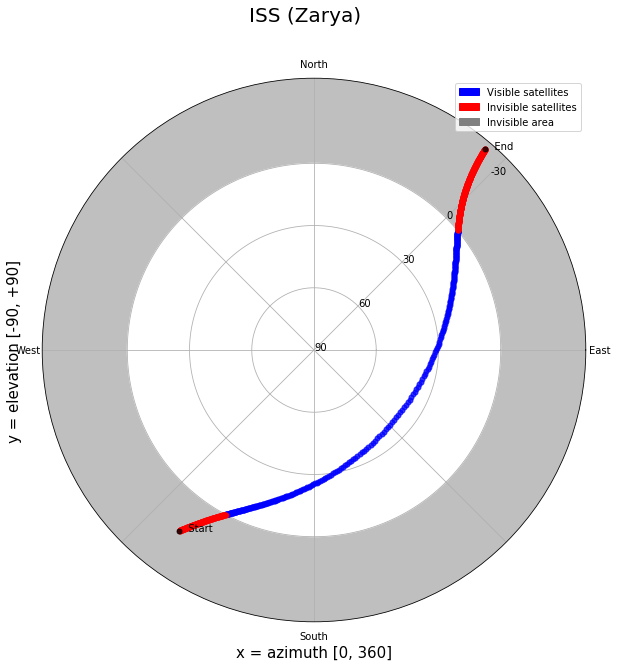

None

In [11]:
from datetime import timedelta

start = datetime(year=2018,
                 month=10,
                 day=1,
                 hour=11,
                 minute=57,
                 second=0,
                 tzinfo=timezone.utc)
start += timedelta(hours=3)

end = start + timedelta(seconds=2000)
df = plotter.see_satellite(iss, OBS_LAT, OBS_LON, OBS_ALT, start=start, end=end, count=1000, annotate=False, title='ISS (Zarya)')
plt.show()
display(df)

Step = 1
plotted points between [2018-10-30 17:40:00+00:00] and [2018-10-30 18:40:00+00:00].
xy = (0.7853981633974483, 90.0)
xy = (0.7853981633974483, 60.0)
xy = (0.7853981633974483, 30.0)
xy = (0.7853981633974483, 0.0)
xy = (0.7853981633974483, 120.0)


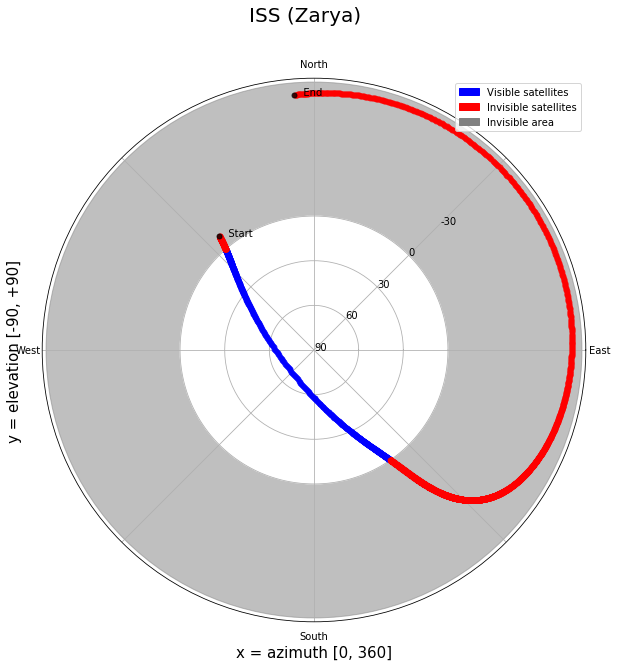

None

In [31]:
from datetime import timedelta

start = datetime(year=2018,
                 month=10,
                 day=30,
                 hour=14,
                 minute=40,
                 second=0,
                 tzinfo=timezone.utc)
start += timedelta(hours=3)

end = start + timedelta(seconds=3600)
df = plotter.see_satellite(iss, OBS_LAT, OBS_LON, OBS_ALT, start=start, end=end, count=10000, annotate=False, title='ISS (Zarya)')
plt.show()
display(df)

2018-10-26 04:07:03.543151+00:00
2018-10-27 04:07:03.543151+00:00
Step = 8
plotted points between [2018-10-26 04:07:03.543151+00:00] and [2018-10-27 02:20:15.543151+00:00].
xy = (0.7853981633974483, 90.0)
xy = (0.7853981633974483, 60.0)
xy = (0.7853981633974483, 30.0)
xy = (0.7853981633974483, 0.0)
xy = (0.7853981633974483, 120.0)


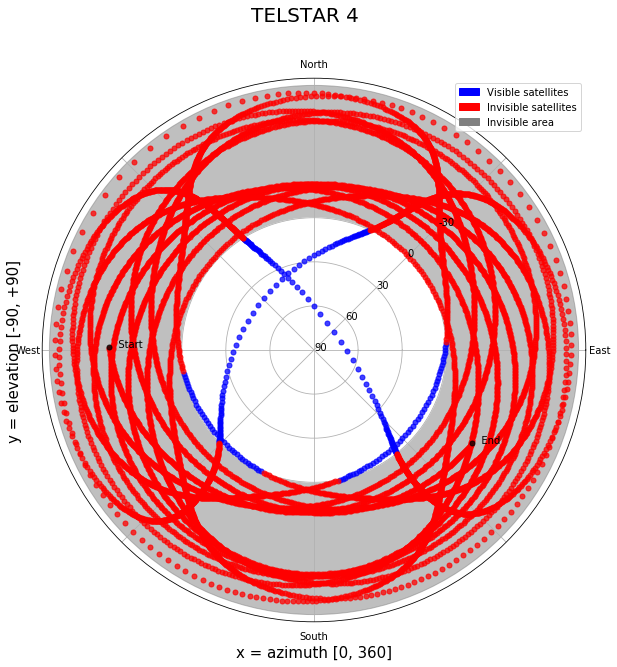

None

In [32]:
def plot_sat(name, tle1, tle2, obs_lat, obs_lon, obs_alt, start=None, end=None):
    if start is None:
        start = datetime.now(timezone.utc)
        print(start)
    if end is None:
        end = start + timedelta(seconds=3600 * 24)
        print(end)
    
    sat = Satellite(tle1, tle2)
    df = plotter.see_satellite(iss, obs_lat, obs_lon, obs_alt, start=start, end=end, count=10000, annotate=False, title=name)
    plt.show()
    display(df)
    
plot_sat('TELSTAR 4',
         '1 23670U 95049A   18297.32130323 -.00000194 +00000-0 +00000-0 0  9994',
         '2 23670 011.3140 032.7443 0005992 252.2037 133.9454 01.00279297084502',
         -1.752453,
         -89.445483,
         0,)

xy = (0.7853981633974483, 90.0)
xy = (0.7853981633974483, 60.0)
xy = (0.7853981633974483, 30.0)
xy = (0.7853981633974483, 0.0)
xy = (0.7853981633974483, 120.0)


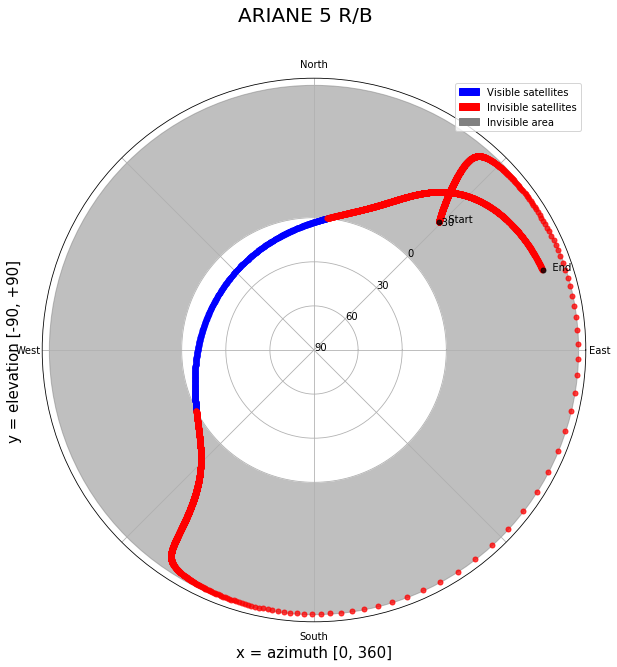

None

In [28]:
start = datetime(year=2018,
                 month=9,
                 day=25,
                 hour=17,
                 minute=25,
                 second=40,
                 tzinfo=timezone.utc)
end = start + timedelta(hours=2)

plot_sat('ARIANE 5 R/B',
         '1 25990U 99066B   18263.95148864 -.00000062  00000-0  00000+0 0  9998',
         '2 25990  61.8726  65.7628 7857263  80.4884   0.5357  0.55293909 25729',
         -15.995,
         -48.047,
         1201,
         start=start,
         end=end)